### Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
# Importando libs de plot
import seaborn as sns
import matplotlib.pyplot as plt

### Reading Dataset

In [2]:
df = pd.read_csv('Churn.csv')

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
(df
 .isna()
 .sum()
 .sort_values(ascending=False)
 .reset_index()
 .rename(columns = {'index' : "Column", 0 : "Missing"})
)

,Column,Missing
0,Tenure,909
1,RowNumber,0
2,CustomerId,0
3,Surname,0
4,CreditScore,0
5,Geography,0
6,Gender,0
7,Age,0
8,Balance,0
9,NumOfProducts,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.duplicated().sum()

0

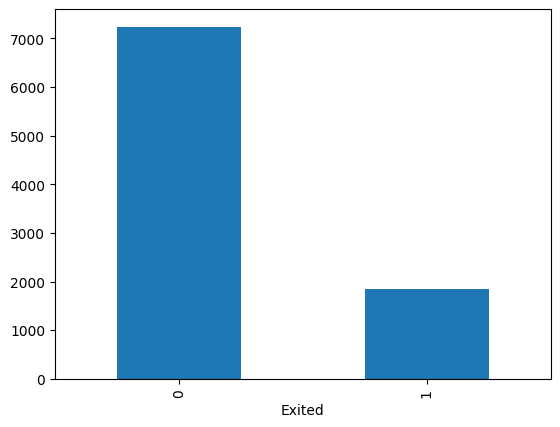

In [8]:
df['Exited'].value_counts().plot(kind='bar');

In [9]:
1 - df['Exited'].mean()

0.7960620393796062

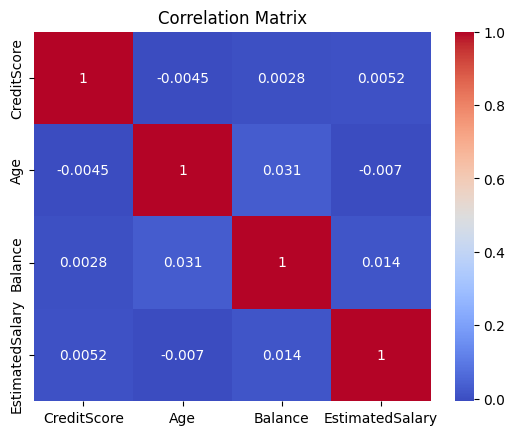

In [10]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
cor_matrix = df[numeric].corr()
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm');
plt.title('Correlation Matrix');

### Defining a function to generate a confusion matrix

In [11]:
def get_cm(target, pred):
    cm = confusion_matrix(target, pred)
    fig, ax = plt.subplots(figsize = (7, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Preticted Values')
    ax.set_ylabel('Actual Values');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True']);


### Defining the features and target

In [12]:
features = df.drop(['Surname', 'Geography', 'Gender', 'Exited'], axis=1)
target = df['Exited']

### Dividing the set

In [13]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
features_train, features_val, target_train, target_val = train_test_split(features_train, target_train, test_size=0.2, random_state=42)

In [14]:
len(features_train), len(features_test), len(features_val)

(5817, 1819, 1455)

### Checking the best model

### DecisionTree

In [15]:
best_f1 = 0
best_depth = 0

for depth in range(1, 101):
    model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    model.fit(features_train, target_train)

    pred_val = model.predict(features_val)
    f1_val = f1_score(target_val, pred_val,)

    if f1_val > best_f1:
        best_f1 = f1_val
        best_depth = depth

In [16]:
print(f'Best F1: {best_f1}')
print(f'Best Depth: {best_depth}')

Best F1: 0.555956678700361
Best Depth: 11


In [17]:
model = DecisionTreeClassifier(random_state=42, max_depth=11)
model.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [18]:
pred_val = model.predict(features_val)

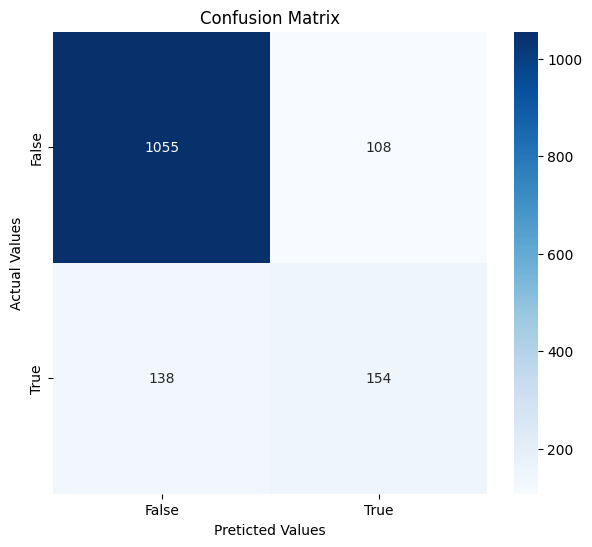

In [19]:
get_cm(target_val, pred_val)

We noticed a ok f1_score for our start, but when analyzing the confusion matrix we see a kinda high number of errors (246 errors).

### RandomForest

In [20]:
best_f1 = 0
best_est = 0

for est in range(1, 151):
    model = RandomForestClassifier(random_state=42, n_estimators=est)
    model.fit(features_train, target_train)

    pred_val = model.predict(features_val)
    f1_val = f1_score(target_val, pred_val)

    if f1_val > best_f1:
        best_f1 = f1_val
        best_est = est

In [21]:
print(f'Best F1: {best_f1}')
print(f'Best n-est: {best_est}')

Best F1: 0.5564853556485355
Best n-est: 137


In [22]:
model = RandomForestClassifier(random_state=42, n_estimators=137)
model.fit(features_train, target_train)

RandomForestClassifier(n_estimators=137, random_state=42)

In [23]:
pred_val = model.predict(features_val)

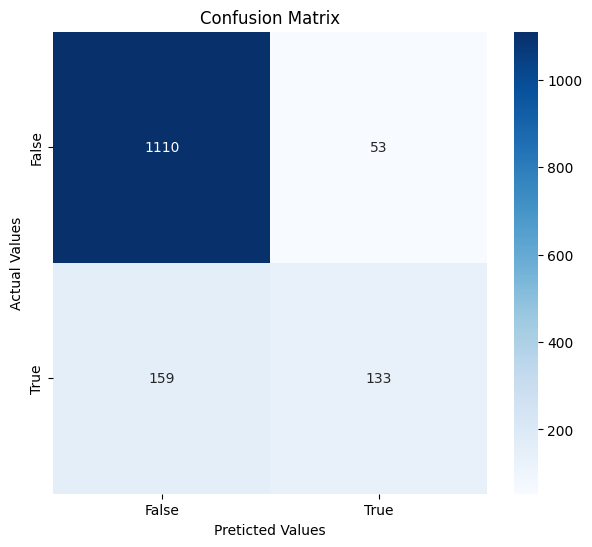

In [24]:
get_cm(target_val, pred_val)

We noticed a ok f1_score, and we see a little less errors in the confusion matrix compared to DecisionTree, for now RandomForest is the best model option.

### LogisticRegression

In [25]:
model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

In [26]:
pred_val = model.predict(features_val)

In [27]:
f1 = f1_score(target_val, pred_val)
print(f'F1: {f1}')

F1: 0.48333333333333334


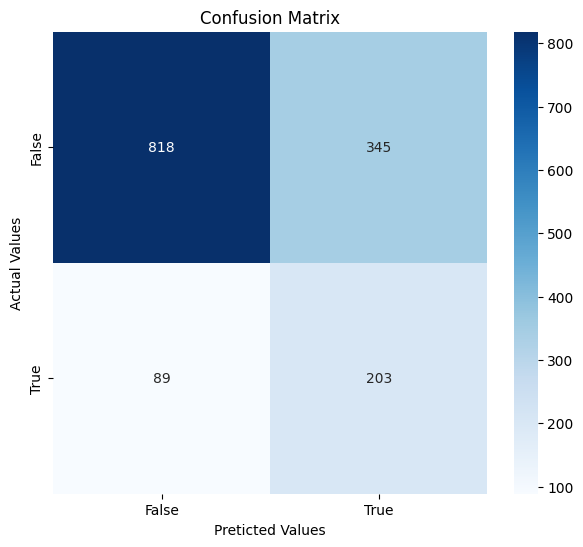

In [28]:
get_cm(target_val, pred_val)

We see the lowest f1_score of our 3 tested models, and also the highest amount of errors in the confusion matrix, we discard LogisticRegression.

### Fixing classes imbalance

To continue the training we will use the RandomForest model with n_estimators=137. Best F1: 0.5564853556485355 (212 errors in the confusion matrix)

### Oversampling

In [29]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=42)

    return features_upsampled, target_upsampled

In [30]:
best_f1 = 0 
best_rep = 0

for repeat in range(1, 21):
    features_upsampled, target_upsampled = upsample(features_train, target_train, repeat)

    model = RandomForestClassifier(random_state=42, n_estimators=137)
    model.fit(features_upsampled, target_upsampled)

    pred_val = model.predict(features_val)
    f1 = f1_score(target_val, pred_val)

    if f1 > best_f1:
        best_f1 = f1
        best_rep = repeat
    

In [31]:
print(f'Best F1: {best_f1}')
print(f'Best repeat: {best_rep}')

Best F1: 0.5812619502868069
Best repeat: 3


In [32]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

We noticed an increase in f1_score after using upsampling.

### Adjusting class weight

In [33]:
model = RandomForestClassifier(random_state=42, n_estimators=137, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(class_weight='balanced', n_estimators=137,
                       random_state=42)

In [34]:
pred_val = model.predict(features_val)

In [35]:
f1 = f1_score(target_val, pred_val)
print(f'F1: {f1}')

F1: 0.5719769673704415


An increase in f1_score compared to the model tested with the imbalance.

### Tuning max_depth hyperparameter

In [36]:
best_f1 = 0
best_depth = 0

for depth in range(1, 51):
    model = RandomForestClassifier(random_state=42, n_estimators=137, max_depth=depth, class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)

    pred_val = model.predict(features_val)
    f1_val = f1_score(target_val, pred_val)

    if f1_val > best_f1:
        best_f1 = f1_val
        best_depth = depth

In [37]:
print(f'Best F1: {best_f1}')
print(f'Best depth: {best_depth}')

Best F1: 0.6085672082717873
Best depth: 8


### Testing model quality

In [38]:
model = RandomForestClassifier(random_state=42, n_estimators=137, max_depth=8, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=137,
                       random_state=42)

In [39]:
pred_test = model.predict(features_test)

In [40]:
f1 = f1_score(target_test, pred_test)
print(f'F1: {f1}')

F1: 0.5971223021582733


In [41]:
prob_test = model.predict_proba(features_test)
prob_one_test = prob_test[:, 1]

In [43]:
auc_roc = roc_auc_score(target_test, prob_one_test)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.8390189293710564


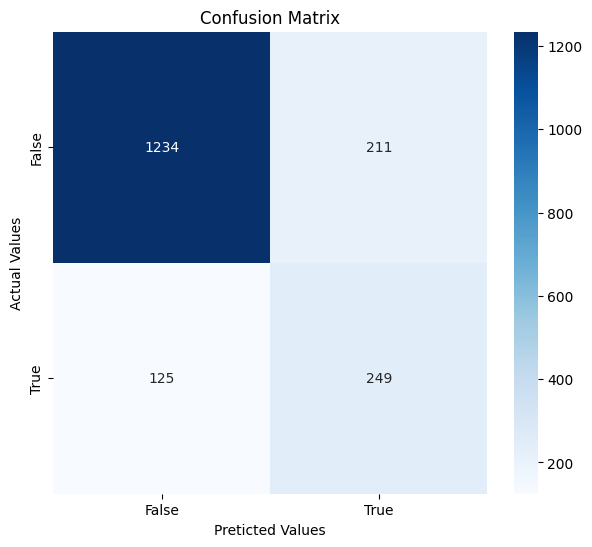

In [46]:
get_cm(target_test, pred_test)

### Conclusion

After analyzing the data, optimizing the hyperparameters, and adjusting the classes weight, we obtained a trained model with a good AUC-ROC (0.8390189293710564) score, and increased our F1_score to approximately 0.6 (F1: 0.5971223021582733)